<center>
    <h1>CYPRUS INTERNATIONAL UNIVERSITY</h1>
    <h2><b>School of Applied Science</b></h2>
    <h3>Department of <span style="color:black;">Data Science</span></h3>
    <br>
    <img src="https://moodle.ciu.edu.tr/pluginfile.php/1/core_admin/logocompact/300x300/1728932360/ciulogo.png", width="150",height="150">
    <br><br>
    <h3><b>Name & Surname :</b></h3><span style="color:blue;"> TIMOTHEE KABONGO NKWAR</span></h3>
    <h3><b>INSTRUCTOR :</b> <span style="color:blue;">Dr. Yasemin Bay</span></h3>
    <h3><b>COURSE NAME :</b> <span style="color:blue;">DASC311 Statistical Machine Learning</span></h3>
    <br>
    <h3><b>Student ID:</b><span style="color:blue;">22205731</span> <span style="color:red;"></span></h3>
</center>


**Introduction to the Machine Learning Project**

Hello everyone,

Today, I’ll be presenting a machine learning project with the goal of predicting the **gender** (Male or Female) of individuals based on their **lifestyle and health-related habits**. This project leverages a dataset containing personal and behavioral information, such as:

* Frequency of physical activity
* Time spent using technology
* Frequency of vegetable consumption
* Number of daily meals
* Water consumption

These features were used to train and evaluate three different classification models:

1. **Logistic Regression**: A simple yet effective model that predicts a binary outcome based on independent variables. It serves as a baseline for comparison.

2. **Random Forest Classifier**: A powerful ensemble model based on multiple decision trees. It can capture complex relationships between features and handle interactions between variables more effectively.

3. **Gaussian Naive Bayes**: A probabilistic model that assumes feature independence. Despite its simplicity, it can perform quite well with well-distributed data.

The goal of this project is to compare the performance of these three models using metrics such as **accuracy**, **F1-score**, and **confusion matrices**. By analyzing these results, we aim to identify which model performs best for this binary classification task and gain insights into which lifestyle factors are most predictive of gender.

By the end of this presentation, you'll have a clear understanding of the models' performances and insights into the lifestyle factors that influence gender prediction.

---



In [117]:
from ucimlrepo import fetch_ucirepo 
# fetch dataset 
data = fetch_ucirepo(id=544) 
# data (as pandas dataframes) 
data = data.data.features

### Additional Information

This dataset includes data for the estimation of obesity levels in individuals from the countries of **Mexico**, **Peru**, and **Colombia**, based on their eating habits and physical condition.

The data contains **17 attributes** and **2111 records**, and the records are labeled with the class variable **NObesity** (Obesity Level), which allows classification of the data using the following categories:
- **Insufficient Weight**
- **Normal Weight**
- **Overweight Level I**
- **Overweight Level II**
- **Obesity Type I**
- **Obesity Type II**
- **Obesity Type III**

**77%** of the data was generated synthetically using the **Weka tool** and the **SMOTE filter**, while **23%** of the data was collected directly from users through a web platform.

### Link to the dataset:
[Estimation of Obesity Levels Dataset](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition-)


In [118]:
# check the size of the dataset
data.shape

(2111, 16)

-  **Importing the libraries**

In [178]:
# alll the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from itables import show

In [179]:
# load the data
show(data.head())

## DATA PREPROCESSING AND EDA

In [180]:
# Convert the gender into a boolean
data_clean = pd.get_dummies(data, columns=["Gender", "CAEC", "CALC", "MTRANS",
                                             "family_history_with_overweight","SMOKE"],
                              drop_first=True,dtype=int)

# delete some useless columns
data_clean.drop( columns =['family_history_with_overweight_yes','FAVC','SCC','SMOKE_yes',
                             'CALC_no','CAEC_Sometimes', 'CAEC_no', 'CALC_Frequently', 'MTRANS_Motorbike',
                             'MTRANS_Public_Transportation', 'MTRANS_Walking','CAEC_Frequently','CALC_Sometimes',  
                             'MTRANS_Bike'], axis=1, inplace=True)

# rename the colonne Gender_male tu Gender
data_clean.rename(columns={'Gender_Male':"Gender"}, inplace=True)
show(data_clean.head())


### Feature Descriptions

- **FAF**: Physical Activity Frequency  
  *How often the individual engages in physical activity.*
- **TUE**: Time Using Technology Devices  
  *Daily time spent using technological devices (e.g., phone, computer).*
- **FCVC**: Frequency of Consumption of Vegetables  
  *How frequently vegetables are consumed.*
- **NCP**: Number of Main Meals  
  *Number of main meals consumed per day.*
- **CH2O**: Daily Water Consumption  
  *Average amount of water consumed per day.*

<Axes: ylabel='Height'>

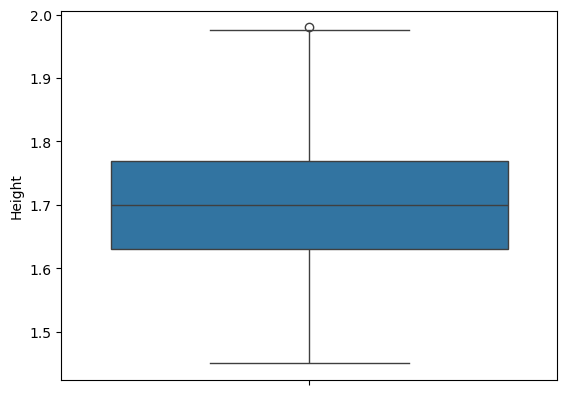

In [122]:
sns.boxplot(data_clean["Height"])

<Axes: ylabel='Weight'>

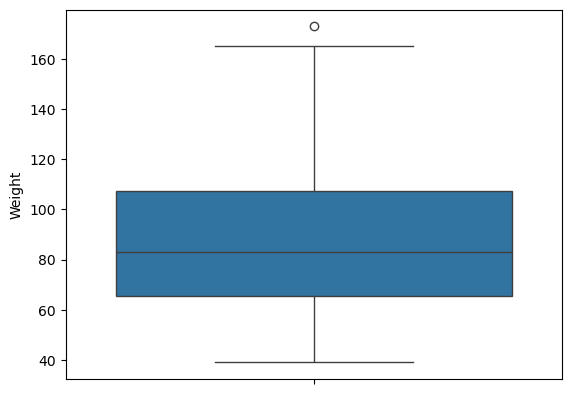

In [123]:
sns.boxplot(data_clean["Weight"])

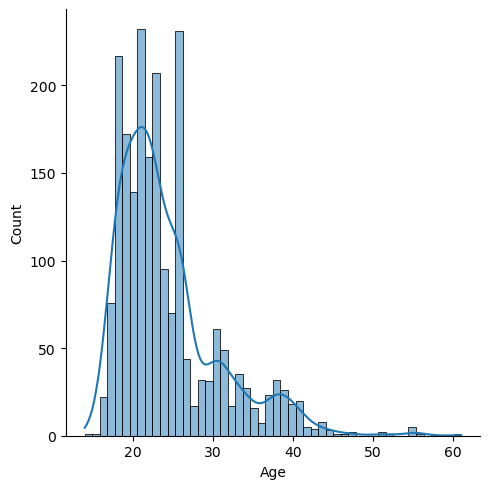

In [124]:
sns.displot(data_clean["Age"],kde=True)

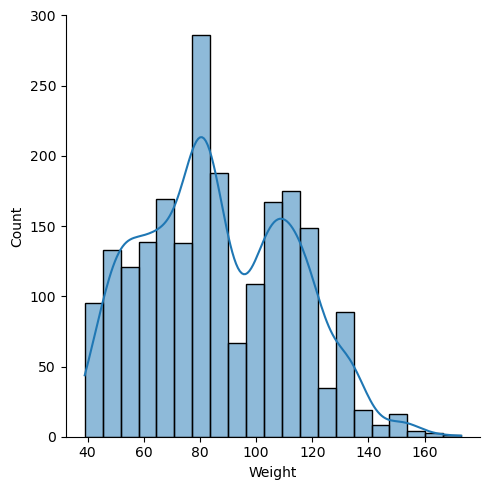

In [125]:

sns.displot(data_clean["Weight"],kde=True)

- **Check the columns and the data types of the dataset**

In [126]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     2111 non-null   float64
 1   Height  2111 non-null   float64
 2   Weight  2111 non-null   float64
 3   FCVC    2111 non-null   float64
 4   NCP     2111 non-null   float64
 5   CH2O    2111 non-null   float64
 6   FAF     2111 non-null   float64
 7   TUE     2111 non-null   float64
 8   Gender  2111 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 148.6 KB


- **Some statistics**

In [127]:
# Statistics for the data
data_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00
Gender,2111.0,0.505921,0.500083,0.00,0.000000,1.000000,1.000000,1.00


- **Handling missing values**

In [128]:
# there are no null values
data_clean.isnull().sum()

Age       0
Height    0
Weight    0
FCVC      0
NCP       0
CH2O      0
FAF       0
TUE       0
Gender    0
dtype: int64

- **Handling duplicated values**

In [129]:
duplicates = data_clean[data_clean.duplicated()]# Check for duplicates in the 'data_clean' DataFrame
data_clean = data_clean.drop_duplicates()# Remove duplicates from data_clean
data_clean.shape # View the cleaned DataFrame

(2086, 9)

# 1 LOGISTIC REGRESSION



**Logistic Regression** is a supervised learning algorithm used for binary classification (and extended to multiclass with variations). Unlike linear regression, which predicts continuous values, logistic regression predicts probabilities and classifies data into discrete categories.

It works by estimating the probability of an event occurring based on the input features, using the **logistic (sigmoid)** function to output a value between 0 and 1. The threshold (usually 0.5) is then used to classify data into one of two classes.

### Key Characteristics:
- **Supervised learning**: It requires labeled data for training.
- **Binary classification**: Often used for problems where the output is binary (e.g., spam vs. not spam).
- **Multiclass extension**: Can be extended to handle multiclass classification using methods like One-vs-Rest (OvR) or Softmax regression.
- **Output**: Predicts probabilities that are mapped to class labels using a threshold (e.g., 0.5 for binary classification).


### Data Preprocessing

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Features and target variable
X = data_clean.drop(columns=['Gender'], axis=1).values
y = data_clean['Gender']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Optionally, convert the scaled X_train and X_test to DataFrames (if you want column names)
X_train = pd.DataFrame(X_train, columns=data_clean.columns[:-1])
X_test = pd.DataFrame(X_test, columns=data_clean.columns[:-1])
# Checking the head of the scaled dataset
X_train.head()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,0.254342,-0.793842,0.810386,1.082727,0.390209,-0.408179,-1.087896,-0.325519
1,-0.835243,-0.216624,1.549235,1.082727,0.390209,-0.927710,0.483382,-0.001770
2,-0.683800,-1.533423,-1.351814,-0.787878,0.390209,-0.008605,2.328568,-1.091078
3,-0.340580,0.878553,0.112961,-0.825395,-1.443658,-0.008605,-0.987847,0.256788
4,-0.369748,-0.996366,-0.912420,1.082727,0.390209,1.636439,-0.015586,-1.091078


In [131]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape
# what is X_train ?  X-train is the training data
# what is X_test ? X-test is the test data 
# what is y_train ? y-train is the training data and it is the target variable
# what is y_test ? y-test is the test data and it is the target variable


((2086, 8), (2086,), (1668, 8), (418, 8), (1668,), (418,))

### MODEL SELECTION

In [132]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
# why solver and max_iterations? solver is the algorithm to use in the optimization problem and max_iterations is the maximum number of iterations taken for the solvers to converge
log_reg = LogisticRegression(solver='liblinear',max_iter=500)

# Train the model
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=500, solver='liblinear')

In [133]:
# Make predictions on the test set
y_pred_log = log_reg.predict(X_test)

In [181]:

y_pred_log

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,

## MODEL EVALUATION

In [135]:
#Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred_log))
confusion_matrix = confusion_matrix(y_test, y_pred_log)

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       200
           1       0.83      0.86      0.84       218

    accuracy                           0.83       418
   macro avg       0.84      0.83      0.83       418
weighted avg       0.84      0.83      0.83       418



In [136]:
# 80% of accuracy ,which is good
accuracy_score = accuracy_score(y_test, y_pred_log)
print("accuracy_score : ",accuracy_score)

accuracy_score :  0.8349282296650717


In [137]:
error_rate = 1 -accuracy_score 
error_rate

0.16507177033492826

In [138]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

logcm =confusion_matrix(y_test, y_pred_log)
logcm

array([[161,  39],
       [ 30, 188]])

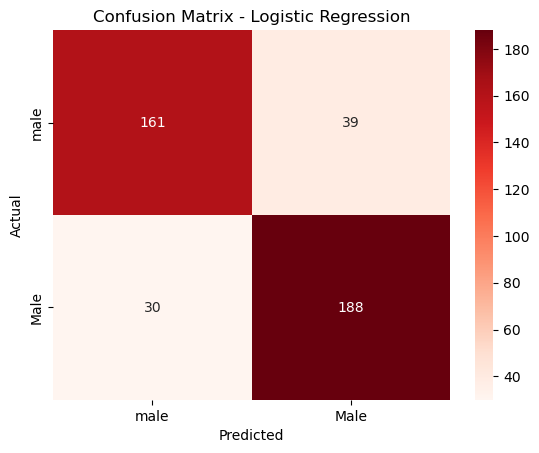

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(logcm, annot=True, fmt='d', cmap='Reds', xticklabels=['male', 'Male'], yticklabels=['male', 'Male'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.savefig("Logistic_regression.png")
plt.show()

In [140]:
# Save the model
import joblib
joblib.dump(log_reg, "logistic_regression_model.pkl")

['logistic_regression_model.pkl']

- **Test the model unseen data (Logistic model)**

In [141]:
# Load the model
log_reg_model = joblib.load("logistic_regression_model.pkl")   
#we can see the type of the model
type(log_reg_model)

sklearn.linear_model._logistic.LogisticRegression

In [142]:
#let's predict the new data 
new_data1 = [[35,1.7,70,3,5,0,3,4]]
# let's scale the new data
new = pd.DataFrame(scaler.transform(new_data1), columns = data_clean.columns[:-1])

In [143]:
#here the new data is scaled
new

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,1.671588,-0.029664,-0.644963,1.082727,3.009017,-3.298695,2.328568,5.488087


In [144]:
#let's predict the new data
prediction1 = log_reg_model.predict(new)
if prediction1 == 0:
     print("The gender is male!")
else:
     print("The gender is male !")

The gender is male!


In [145]:
#let's predict the new data2 
new_data2 = [[85,2.9,80,3,5,0,3,78]]
# let's scale the new data2
new2 = pd.DataFrame(scaler.transform(new_data2), columns = data_clean.columns[:-1])
new2

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,9.52288,12.859699,-0.262881,1.082727,3.009017,-3.298695,2.328568,127.202636


In [146]:
#let's predict the new data2
prediction2 = log_reg_model.predict(new2)
if prediction2 == 0:
     print("The gender is male !")
else:
     print("The gender is male !")

The gender is male !


# 2 Random Forest

### Random Forest

**Random Forest** is an ensemble learning method that combines multiple decision trees to create a more robust and accurate model. It builds a collection of decision trees during training and outputs the majority vote (for classification) or average (for regression) of the individual trees' predictions.

Random Forest overcomes the limitation of individual decision trees, which can easily overfit the data, by averaging multiple trees to reduce variance and improve generalization.

### Key Characteristics:
- **Ensemble learning**: Combines multiple decision trees to create a stronger model.
- **Bootstrapping**: Uses random sampling with replacement (bootstrap) to build different training subsets for each tree.
- **Feature randomness**: During tree construction, each tree is trained on a random subset of features, further promoting diversity among trees.
- **Robustness**: Handles overfitting better than a single decision tree by averaging multiple trees' results.
- **Versatility**: Works well for both classification and regression tasks.

### Strengths:
- **High accuracy**: Due to the averaging of many decision trees, Random Forest generally provides better accuracy than a single decision tree.
- **Robust to overfitting**: While individual trees may over


In [147]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report

### Splitting Steps

In [148]:
X = data_clean.drop(columns=['Gender'], axis=1).values
y = data_clean['Gender']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)# Split the dataset into training and test sets


scaler = StandardScaler()# Initialize the scaler
X_train_scaled = scaler.fit_transform(X_train)# Fit the scaler on the training data only and transform
X_test_scaled = scaler.transform(X_test)# Transform the test data using the same scaler

In [149]:
# Convert scaled data back to DataFrame (optional, for inspection)
columns = data_clean.columns[:-1]  # Exclude 'Gender'
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=columns)
X_test_scaled_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,-0.199024,0.534952,1.281803,-0.796797,0.396466,0.001669,1.177741,0.537812
1,-0.980558,-1.179830,-1.267989,-2.666115,0.396466,-1.650187,-0.001353,2.188738
2,-0.125632,-2.068237,-0.818385,-0.324847,1.688077,0.001669,-0.078836,0.357244
3,-0.036324,-1.038081,0.505659,1.072520,-1.877634,-1.650187,-0.139105,1.170108
4,-0.199024,1.285169,0.787067,-0.796797,0.396466,1.653524,-1.180447,0.537812
...,...,...,...,...,...,...,...,...
413,1.364046,0.213431,-0.126291,-0.796797,-2.221702,0.001669,2.356836,-1.113113
414,-0.851327,0.496541,1.804967,1.072520,0.396466,1.419603,0.522615,0.065355
415,-0.511638,-1.014739,-0.688520,-0.796797,-1.023366,1.653524,-0.001353,-1.113113
416,0.269897,-0.719164,0.945299,1.072520,0.396466,1.057033,-1.180447,-0.742383


In [150]:
X_train_scaled_df.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,0.265903,-0.763406,0.828549,1.072520,0.396466,-0.399559,-1.080084,-0.344700
1,-0.818694,-0.187464,1.564467,1.072520,0.396466,-0.921241,0.500602,-0.019743
2,-0.667944,-1.501351,-1.325074,-0.796797,0.396466,0.001669,2.356836,-1.113113
3,-0.326296,0.905292,0.133890,-0.834288,-1.436953,0.001669,-0.979435,0.239779
4,-0.355331,-0.965482,-0.887423,1.072520,0.396466,1.653524,-0.001353,-1.113113


## Training the model

In [151]:
# Train the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

## MODEL EVALUATION

In [152]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report
# Assuming y_pred was generated from rf_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy score is : {accuracy:.4f}")


Accuracy score is : 0.9330


In [153]:

# Calculate and print confusion matrix
rf_modelfcm = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:")
print(rf_modelfcm)


Confusion Matrix:
[[182  18]
 [ 10 208]]


In [154]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       200
           1       0.92      0.95      0.94       218

    accuracy                           0.93       418
   macro avg       0.93      0.93      0.93       418
weighted avg       0.93      0.93      0.93       418



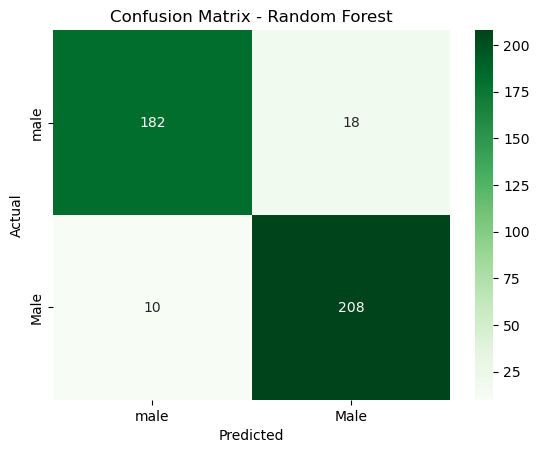

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(rf_modelfcm , annot=True, fmt='d', cmap='Greens', xticklabels=['male', 'Male'], yticklabels=['male', 'Male'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.savefig("Random_forest.png")
plt.show()

### Save the model

In [156]:
# Save the model
import joblib
joblib.dump(rf_model, "Random_Forest_model.pkl")

['Random_Forest_model.pkl']

### Load the model

In [157]:
# Load the model
Random_Forest_model = joblib.load("Random_Forest_model.pkl")   

Random_Forest_model

RandomForestClassifier(random_state=42)

- **Test the model on unseen data (Random forest)**

                         1 example

In [158]:
#let's predict the new data using random forest
new_data1 = [[35,1.7,70,3,5,0,3,4]]
# let's scale the new data
new = pd.DataFrame(scaler.transform(new_data1), columns = data_clean.columns[:-1])

In [159]:
#let's predict the new data
prediction1 = Random_Forest_model.predict(new)
if prediction1 == 0:
     print("The gender is male!")
else:
     print("The gender is female!")

The gender is male!


                         2 example

In [160]:
#let's predict the new data2 
new_data2 = [[85,2.9,80,3,5,0,3,78]]
# let's scale the new data2
new2 = pd.DataFrame(scaler.transform(new_data2), columns = data_clean.columns[:-1])
new2

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,9.492007,12.859948,-0.240461,1.07252,3.014635,-3.302042,2.356836,127.659074


In [161]:
#let's predict the new data
prediction2 = Random_Forest_model.predict(new2)
if prediction2 == 0:
     print("The gender is male!")
else:
     print("The gender is female !")

The gender is female !


# 3 NAIVE BAYES

### Naive Bayes

**Naive Bayes** is a probabilistic classification algorithm based on applying **Bayes' Theorem** with strong (naive) independence assumptions. It is particularly suited for large datasets and works well with categorical input features.

Naive Bayes assumes that the features are independent given the class label, which simplifies the computation of the likelihood. Despite this simplifying assumption, Naive Bayes often performs surprisingly well in practice, especially for text classification problems.

### Key Characteristics:
- **Probabilistic approach**: Estimates the probability of each class based on the input features.
- **Naive assumption**: Assumes that the features are conditionally independent given the class label.
- **Fast and scalable**: Ideal for large datasets, particularly in text classification tasks (e.g., spam detection).
- **Works well with categorical data**: Often used with datasets where features


### Splitting dataset

In [162]:
# Import necessary libraries as usually
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report

In [163]:
X = data_clean.drop(columns=['Gender'], axis=1).values
y = data_clean['Gender']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)# Split the dataset into training and test sets


scaler = StandardScaler()# Initialize the scaler
X_train_scaled = scaler.fit_transform(X_train)# Fit the scaler on the training data only and transform
X_test_scaled = scaler.transform(X_test)# Transform the test data using the same scaler

## Training the model

In [164]:
# Train the Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test_scaled)
y_pred_nb[0]

np.int64(1)

## MODEL EVALUATION

In [165]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy is : {accuracy:.4f}")

Accuracy is : 0.8134


In [166]:
# Calculate and print confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[157  43]
 [ 35 183]]


In [167]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       200
           1       0.81      0.84      0.82       218

    accuracy                           0.81       418
   macro avg       0.81      0.81      0.81       418
weighted avg       0.81      0.81      0.81       418



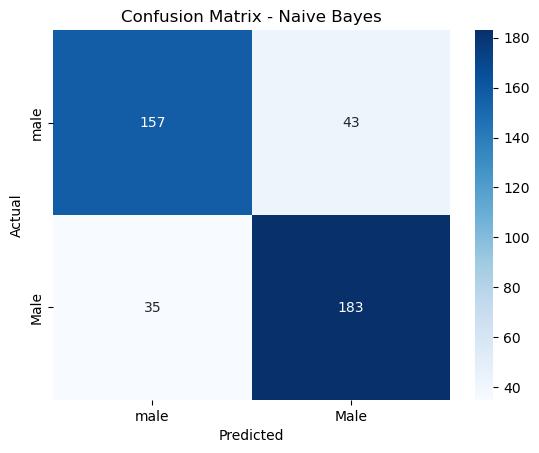

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['male', 'Male'], yticklabels=['male', 'Male'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.savefig("Naive_Bayes.png")
plt.show()

### save the model

In [169]:
# Save the model
import joblib
joblib.dump(nb_model, "Naive_Bayes_model.pkl")

['Naive_Bayes_model.pkl']

### Load the model

In [170]:
# Load the model
Naive_Bayes_model = joblib.load("Naive_Bayes_model.pkl")
Naive_Bayes_model

GaussianNB()

                         1 example

- **Test the model on unseen data (Naive bayes)**

In [171]:
#let's predict the new data using random forest
new_data1 = [[35,1.7,70,3,5,0,3,4]]
# let's scale the new data
new = pd.DataFrame(scaler.transform(new_data1), columns = data_clean.columns[:-1])

In [172]:
#let's predict the new data
prediction1 = Naive_Bayes_model.predict(new)
if prediction1 == 0:
     print("The gender is male!")
else:
     print("The gender is female !")

The gender is female !


                         2 example

In [173]:
#let's predict the new data2 
new_data2 = [[85,2.9,80,3,5,0,3,78]]
# let's scale the new data2
new2 = pd.DataFrame(scaler.transform(new_data2), columns = data_clean.columns[:-1])
new2

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,9.492007,12.859948,-0.240461,1.07252,3.014635,-3.302042,2.356836,127.659074


In [174]:
#let's predict the new data
prediction2 = Naive_Bayes_model.predict(new2)
if prediction2 == 0:
     print("The gender is male!")
else:
     print("The gender is female !")

The gender is female !


# Model Performance Evaluation for Gender Prediction

## Context
I trained 3 classifications models to predict gender (`Male`/`male`) from an encoded dataset:
- **Logistic Regression**: A linear model that estimates the probability of a binary outcome using the logistic (sigmoid) function
- **Random Forest Classifier**: An ensemble model with 100 decision trees.
- **Gaussian Naive Bayes**: A probabilistic model assuming feature independence.

The data was split into 80% training and 20% test sets (`test_size=0.2`, `random_state=0`). Features were standardized using `StandardScaler` to ensure comparable scales.

## Evaluation Metrics
Performance is evaluated using three metrics:
- **Accuracy**: Proportion of correct predictions.
- **Confusion Matrix**: Distribution of correct and incorrect predictions.
- **Classification Report**: Precision, recall, and F1-score per class.

### 1. Logistic Regression

#### Accuracy
- **Accuracy**: 0.8349 (83% of predictions are correct).

![Confusion Matrix](Logistic_regression.png)  

- **Interpretation**:
---
* ✅ **True Positives (TP)** = 161
  Predicted `Male`, and it was actually `Male`.

* ✅ **True Negatives (TN)** = 188
  Predicted `male`, and it was actually `male`.

* ❌ **False Positives (FP)** = 30
  Predicted `Male`, but it was actually `male`.

* ❌ **False Negatives (FN)** = 39
  Predicted `male`, but it was actually `Male`.
---

#### Classification Report for the logistic regression
  | Classes|      Precision          |         Recall                  |   F1-score            |
  |--------|-------------------------|---------------------------------|-----------------------|
  |   0    |          84%            |            81%                  |        82%            |
  |   1    |          83%            |            86%                  |        84%            |

### 1. Random Forest Classifier

#### Accuracy
- **Accuracy**: 0.9330 ( 93% of predictions are correct).

  ![ Random Forest](Random_forest.png)  

- **Interpretation**:
---
* ✅ **True Positives (TP)** = 182
  Predicted `Male`, and it was actually `Male`.

* ✅ **True Negatives (TN)** = 208
  Predicted `male`, and it was actually `male`.

* ❌ **False Positives (FP)** = 10
  Predicted `Male`, but it was actually `male`.

* ❌ **False Negatives (FN)** = 18
  Predicted `male`, but it was actually `Male`.
---

#### Classification Report for the Random Forest Classifier

  | Classes|      Precision          |         Recall                  |   F1-score            |
  |--------|-------------------------|---------------------------------|-----------------------|
  |   0    |          95%            |            91%                  |        93%            |
  |   1    |          92%            |            95%                  |        94%            |

### 1. Naive bayes

#### Accuracy
- **Accuracy**: 0.8134 (78% of predictions are correct).

![Naive Bayes](Naive_Bayes.png)  

- **Interpretation**:

---
* ✅ **True Positives (TP)** = 157
  Predicted `Male`, and it was actually `Male`.

* ✅ **True Negatives (TN)** = 183
  Predicted `male`, and it was actually `male`.

* ❌ **False Positives (FP)** = 35
  Predicted `Male`, but it was actually `male`.

* ❌ **False Negatives (FN)** = 43
  Predicted `male`, but it was actually `Male`.
---

#### Classification Report for the naive bayes model
  | Classes|      Precision          |         Recall                  |   F1-score            |
  |--------|-------------------------|---------------------------------|-----------------------|
  |   0    |          82%            |            79%                  |        80%            |
  |   1    |          81%            |            84%                  |        82%            |
 

## Model Comparison
- **Logistic Regression**:
  - **Strengths**: Simple, fast to train, highly interpretable, performs well with linearly separable data
  - **Weaknesses**: Assumes a linear relationship between features and the log-odds, limited in handling complex or non-linear patterns.
- **Random Forest**:
  - **Strengths**: Higher accuracy , better F1-scores, robust to complex feature interactions.
  - **Weaknesses**: Slower to train, risk of overfitting if not tuned.
- **Naive Bayes**:
  - **Strengths**: Fast, simple, effective for data with relatively independent features.
  - **Weaknesses**: Assumes feature independence, which may limit performance if violated.




## Conclusion
The **Random Forest** model is the better choice for this problem, with an ***accuracy of 93%*** and higher F1-scores for both classes. It handles complex data 
The **Logistic Regression** model achieved ***83% accuracy***, making it a solid and interpretable baseline. It's fast to train and works well when the data is linearly separable.
relationships more effectively. **Naive Bayes** remains competitive ***(81% accuracy)*** and is faster, making it suitable for quick prototyping or simpler datasets.

### Recommendations
1. **Optimization**: Tune Random Forest hyperparameters (e.g., `n_estimators`, `max_depth`) using `GridSearchCV` to improve performance.
3. **Cross-Validation**: Perform cross-validation to confirm performance robustness.


<font color="red">Github : TIMOTHEE NKWAR</font><br>
 **Link to the code** <https://github.com/TimotheeNkwar/School_Project/tree/main/Machine%20Learning>